# ASSIGNMENT 2, COMP5310
## House Price Model

## Instruction on how to run this code
 * Exercises to be completed on IPython notebook such as:

 * IPython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )


### initialization of the library

In [1]:
# library importing
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


C:\Users\syedm\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load and explore Data

In [3]:
df_house = pd.read_csv('kc_house_data.csv',index_col = 0,engine ='c')

df_header = pd.read_csv('kc_house_data.csv',index_col = 0,engine ='c')
df_house
#df_house.drop(df_house.columns[[0]], axis=1, inplace=True)
df=df_house[:10]
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113


In [4]:
# to see the shape of data frame
print(df_house.shape)

(21613, 20)


In [5]:
df_house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# Checking the info of data
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 3.5+ MB



i=0
items=''
for item, val in m:
    items +=str(item) + str(val)
    i+=1
    if (i % 2)==0:
        print(items)
    
print(m)

## Correlation between different features

In [7]:
#show correlation between price and other features
corr_matrix = df_house.corr()
print(corr_matrix["price"].sort_values(ascending=False))

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64


### Scatter plot showing top few features with high correlation with price

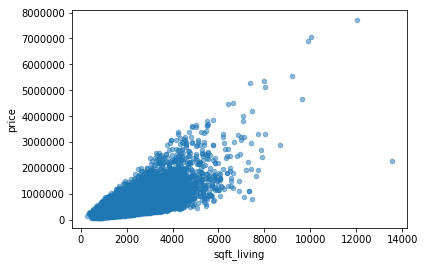

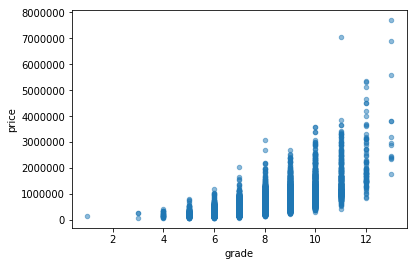

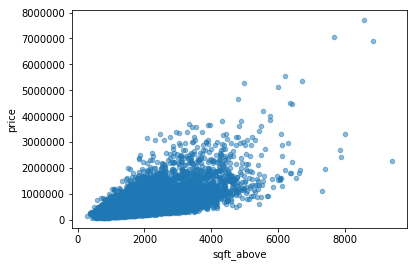

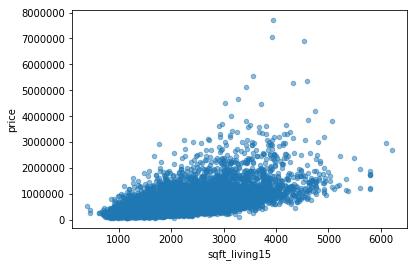

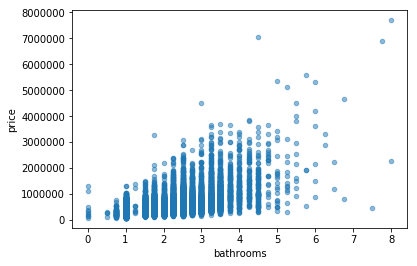

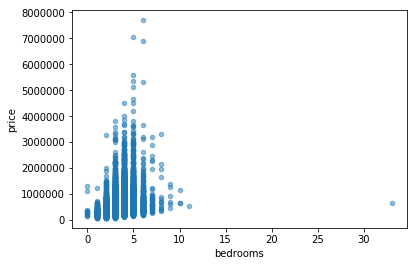

In [8]:

df_house.plot(kind="scatter", x="sqft_living", y="price", alpha=0.5)

df_house.plot(kind="scatter", x="grade", y="price", alpha=0.5)

df_house.plot(kind="scatter", x="sqft_above", y="price", alpha=0.5)

df_house.plot(kind="scatter", x="sqft_living15", y="price", alpha=0.5)

df_house.plot(kind="scatter", x="bathrooms", y="price", alpha=0.5)

df_house.plot(kind="scatter", x="bedrooms", y="price", alpha=0.5)


## Prepare for Regression Model

In [10]:
df_house = pd.read_csv('kc_house_data.csv',index_col = 0,engine ='c')
#Custom Functions--------------
#Divide total data K-training and K-test set
def KFoldCustom(df, K):
        Y=df.iloc[:, 1].values
        Y=df.iloc[:, 1].values
        df.drop(df.columns[[1, 0]], axis=1, inplace=True)
        N=len(df)
        k=int(N/K)
        i,n=0,0
        x_trains, x_tests, y_trains, y_tests, listR2=[],[],[],[],[]
        
        while n<=N:
            x_test=df[n:n+k]
            x_train=df.drop(df.index[n:n+k])
            y_test=Y[n:n+k]
            my_list=list(Y)
            del my_list[n:n+k]

            y_train=np.array(my_list)
            
            n +=k
            if i<=K:
                x_trains.append(x_train)
                x_tests.append(x_test)
                y_trains.append(y_train)
                y_tests.append(y_test)
            i +=1
      
        return x_trains, x_tests, y_trains, y_tests


def KFoldR2_RMSE_MAE_LR(df, K):
        
        x_trains, x_tests, y_trains, y_tests = KFoldCustom(df, K)
        listR2=[]
        listRMSE=[]
        listMAE=[]
        
        for i in range(0, K):
            model=reg.fit(x_trains[i], y_trains[i])
            predicted_price=reg.predict(x_tests[i])

            listR2.append(reg.score(x_tests[i], y_tests[i]))
            
            lin_mse = mean_squared_error(predicted_price, y_tests[i])
            lin_rmse = np.sqrt(lin_mse)
            listRMSE.append(lin_rmse)
            
            listMAE.append(mean_absolute_error(predicted_price, y_tests[i]))

        return listR2, listRMSE, listMAE

#Custom functions  End--------------------



### Run Multiple Linear Regression Model using K-Fold (Training and Predicting)

In [11]:
from sklearn import linear_model
df_house = pd.read_csv('kc_house_data.csv',index_col = 0,engine ='c')
K=3
x_trains, x_tests, y_trains, y_tests = KFoldCustom(df_house, K)
for i in range(0, K):
    reg=linear_model.LinearRegression()
    model=reg.fit(x_trains[i], y_trains[i])
    predicted_price=reg.predict(x_tests[i])
    print('Coefficients for Model (Iteration :{})'.format(i+1))
    print(model.coef_.tolist())
    print('----'*25) 
    

Coefficients for Model (Iteration :1)
[-34658.327412801154, 44752.99379412824, 107.86091780850433, 0.0510639516749789, 7088.299908125104, 485060.36702621286, 54011.06384372532, 27138.447198856265, 98441.671173596, 66.63323902376578, 41.22767880372703, -2480.045537193553, 25.57658512762282, -578.5948251158115, 611581.4541687942, -232722.51688506812, 20.990651428874116, -0.29229027849214617]
----------------------------------------------------------------------------------------------------
Coefficients for Model (Iteration :2)
[-33751.83082787566, 40881.23562146608, 108.33893101180286, 0.16303760957124425, 9316.266033165602, 608284.7086854965, 55265.63186357549, 26691.70698168297, 98486.54919535575, 69.74392381502548, 38.59500721647055, -2557.406750670998, 10.688112930161878, -579.2832614293293, 613408.5128073016, -209815.82891740755, 15.438944936380722, -0.38238302852914785]
----------------------------------------------------------------------------------------------------
Coefficient

### Run Mutiple Linear Regression with K-Fold to get R-Squared and Standard Error and Mean Absolute Error

In [13]:
df_house = pd.read_csv('kc_house_data.csv',index_col = 0,engine ='c')
K=20
lstr2, lstrmse, lstmae=KFoldR2_RMSE_MAE_LR(df_house, K)
sumr2, sumrmse,avgr2, avgrmse, summae, avgmae=0,0,0,0,0,0
for i in lstr2:
    sumr2 +=i
avgr2=sumr2/len(lstr2)
print('Average R-Squared for K-Fold Linear Regression is: ', avgr2)
for i in lstrmse:
    sumrmse +=i
avgrmse=sumrmse/len(lstrmse)
print('Average RMSE (Standard Error) for K-Fold Linear Regression is: ',avgrmse)
for i in lstmae:
    summae +=i
avgmae=summae/len(lstmae)
print('Average Mean Absolute Error for K-Fold Linear Regression is: ', avgmae)

Average R-Squared for K-Fold Linear Regression is:  0.697286550570043
Average RMSE (Standard Error) for K-Fold Linear Regression is:  200969.73557245915
Average Mean Absolute Error for K-Fold Linear Regression is:  126304.57811146388


### Use Random Forest with K-Fold Cross Validation

Average R-Squared for K-Fold Random Forest is:  0.8616025110698035
Average RMSE (Standard Error) for K-Fold Random Forest is:  136325.69326275197
Average MAE (Mean Absolute Error) for K-Fold Random Forest is:  136325.69326275197


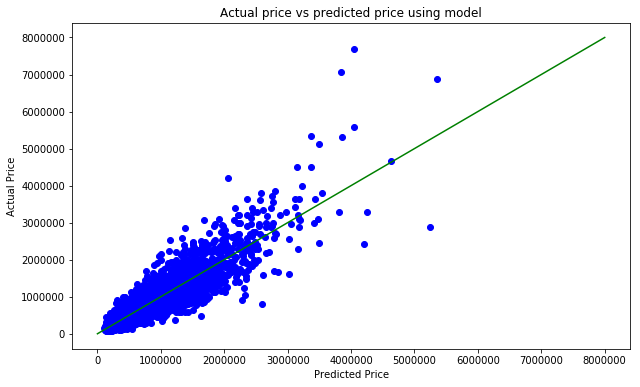

In [14]:
from sklearn.ensemble import RandomForestRegressor

df_house = pd.read_csv('kc_house_data.csv',index_col = 0,engine ='c')

def KFoldR2_RMSE_MAE_RForest(df, K, plot):
        
        x_trains, x_tests, y_trains, y_tests = KFoldCustom(df, K)
        listRMSE, listMAE, Predicted_all, listR2, Y_Tests_All=[],[],[],[],[]      
        for i in range(0, K):
            rf_reg = RandomForestRegressor(random_state=42)
            model=rf_reg.fit(x_trains[i], y_trains[i])
            y_pred=rf_reg.predict(x_tests[i])
            
            model=reg.fit(x_trains[i], y_trains[i])
            predicted_price=rf_reg.predict(x_tests[i])
            
            forest_mse = mean_squared_error(y_pred, y_tests[i])
            forest_rmse = np.sqrt(forest_mse)
            listRMSE.append(forest_rmse)
            
            listR2.append(rf_reg.score(x_tests[i], y_tests[i]))
            listMAE.append(mean_absolute_error(predicted_price, y_tests[i]))
            
            if plot=='Yes':      
                    Predicted_all.append(predicted_price)
                    Y_Tests_All.append(y_tests[i])
                    if i==K-1:
                        df=pd.DataFrame()
                        df['Predicted Price']=Predicted_all[:] #x_tests[i].iloc[:n,2]
                        df['Actual Price']=Y_Tests_All[:]
                        plt.rcParams['figure.figsize']=(10,6)

                        plt.plot(np.arange(8000000), np.arange(8000000), color='g')
                        plt.scatter(Predicted_all, Y_Tests_All, color='b')
                        plt.title("Actual price vs predicted price using model")
                        plt.xlabel("Predicted Price")
                        plt.ylabel("Actual Price")
                                       
        return listR2, listRMSE, listMAE

K=5
lstR2, lstRMSE, lstMAE= KFoldR2_RMSE_MAE_RForest(df_house, K, 'Yes')
sumr2, sumrmse, avgr2, avgrmse, summae, avgmae=0,0,0,0, 0,0
for i in lstR2:
    sumr2 +=i
avgr2=sumr2/len(lstR2)
print('Average R-Squared for K-Fold Random Forest is: ', avgr2)

for j in lstRMSE:
    sumrmse +=j
avgrmse=sumrmse/len(lstRMSE)

print('Average RMSE (Standard Error) for K-Fold Random Forest is: ', avgrmse)
for j in lstMAE:
    summae +=j 
avgmae=sumrmse/len(lstMAE)
print('Average MAE (Mean Absolute Error) for K-Fold Random Forest is: ', avgmae)

### Residual plots

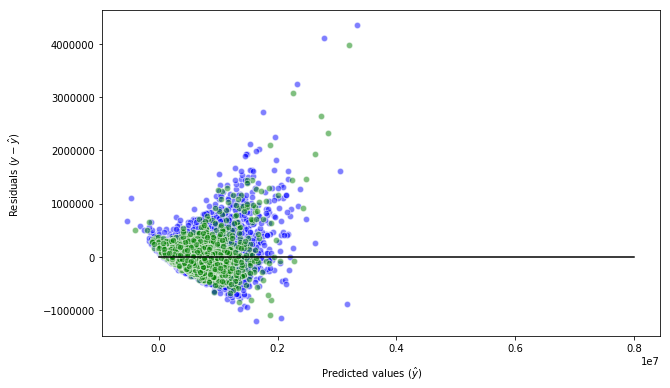

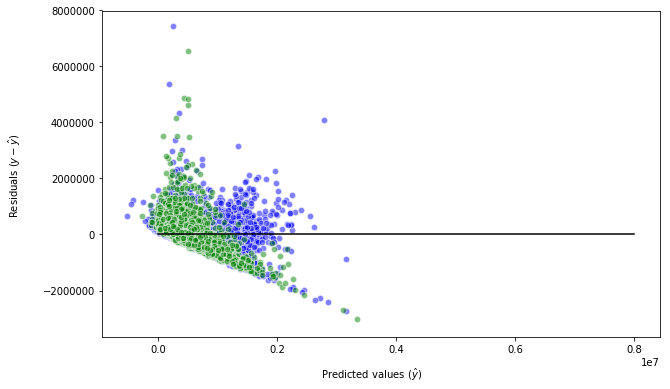

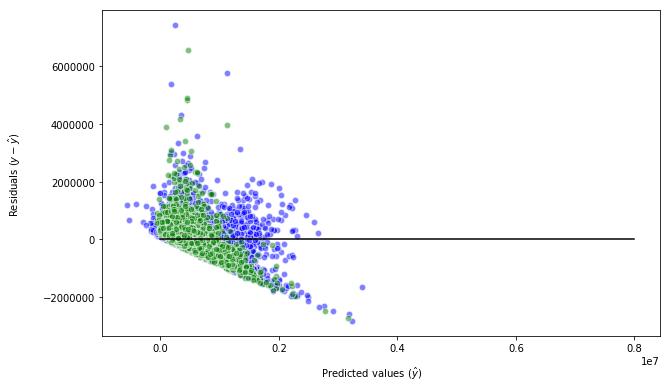

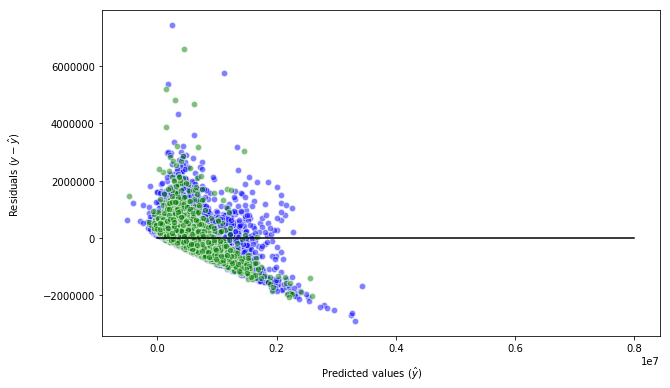

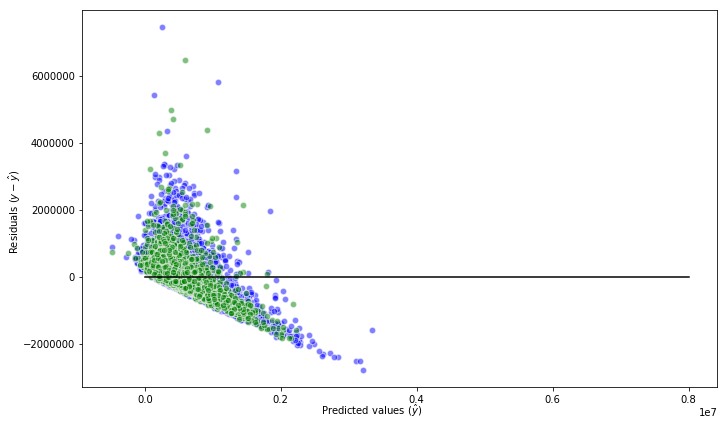

In [16]:
df_house = pd.read_csv('kc_house_data.csv',index_col = 0,engine ='c')
K=5
x_trains, x_tests, y_trains, y_tests = KFoldCustom(df_house, K)
    
for i in range(0,K):
    rf_reg=linear_model.LinearRegression()
    model=rf_reg.fit(x_trains[i], y_trains[i])
    fig, ax = plt.subplots()
    ax.scatter(rf_reg.predict(x_trains[i]), y_trains[0]-rf_reg.predict(x_trains[i]), c='blue', s=40, alpha=0.5, edgecolor='white')
    ax.scatter(reg.predict(x_tests[i]), y_tests[0]-rf_reg.predict(x_tests[i]), c='green', s=40, alpha=0.5, edgecolor='white')
    ax.plot([0,8000000], [0,0], c='black')
    fig.text(0.5, 0.04, 'Predicted values ($\hat{y}$)', ha='center', va='center')
    fig.text(.005, 0.5, 'Residuals ($y - \hat{y}$)', ha='center', va='center', rotation='vertical')
plt.tight_layout()


### Research Question: Which Method is better?

#### Research Question: Is Random Forest is better than Linear Regression? 

-Null Hypothesis(H0):No, both method will give same RMSE(Standard Error)
-Alternative Hypothesis (H1): Both metod will not give same Standard Error i.e sample means are different.

- Use Kruskall-Wallis H-test to test whether the sample means are the same.
- Can we reject the null hypothesis (H0) at p<0.01?
- Is there a reliable difference between Linear Regression and Random Forest?


### Kruskall-Wallis H-test

In [17]:
from scipy import stats

rfR2, rfRMSE, rfMAE=KFoldR2_RMSE_MAE_RForest(df_house, K, 'No')
linR2, LinRMSE, linMAE=KFoldR2_RMSE_MAE_LR(df_house, K)
kw_result = stats.kruskal(rfRMSE, LinRMSE)
print('Can we reject null hypothesis (H0)?', 'Yes' 
      if kw_result.pvalue<0.01 else 'No' )

print('Is there any reliable difference between two method?', 'Yes' 
      if kw_result.pvalue<0.01 else 'No', '(p={:.6f})'.format(kw_result.pvalue))

Can we reject null hypothesis (H0)? Yes
Is there any reliable difference between two method? Yes (p=0.009023)
